# Predictive Modeling Example

**Week04, Polynomial Example Model Fitting**

ISM6136

&copy; 2023 Dr. Tim Smith


<a target="_blank" href="https://colab.research.google.com/github/prof-tcsmith/dm-f23/blob/main/W04/W04.04_model3-polynomial.ipynb#offline=1">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---


## Step 1: Import a number of libraries that we expect to use

In [1]:
# if running on colab, you may need to uncomment the following lines
# if you get an error saying that the module is not found
#!pip install matplotlib
#!pip install numpy
#!pip install pandas
#!pip install sklearn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


np.random.seed(1) # set this to ensure the results are repeatable. 

# this is a notebook 'MAGIC' that will allow for creation of inline plots (this is the defaul, so often not necessary)
%matplotlib inline

In [3]:
%matplotlib widget 

## Step 2: Load the given data that we will model

In [4]:
df = pd.read_csv('./data/c02_dataset_4.csv')

df.head(10)

,X,y
0,16.24,438.12640
1,-6.12,-207.48840
2,-5.28,75.13760
3,-10.73,103.74435
4,8.65,-7.60125
5,-23.02,628.17060
6,17.45,432.34875
7,-7.61,122.10315
8,3.19,83.58915
9,-2.49,153.06515


Seperate out the input m(X) and the target (y)

In [5]:
X = df[['X']]
y = df[['y']]

## Step 3: Explore the given data

Explore the data using a scatterplot.

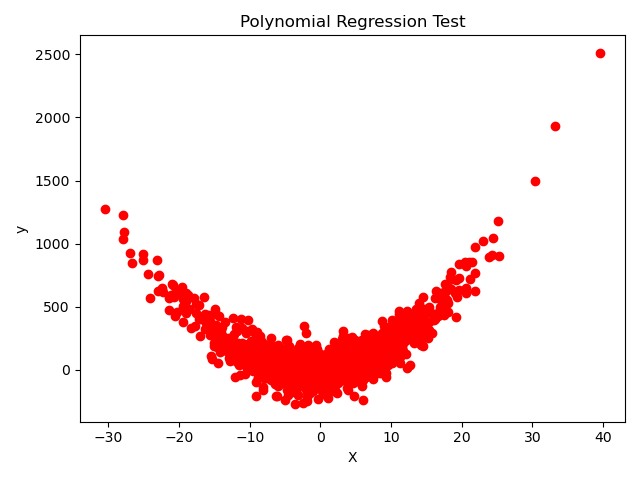

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [7]:
lin_reg1=LinearRegression().fit(X,y)

## Step 5: Analyze the resulting model's performance

Visualize the linear regression model results

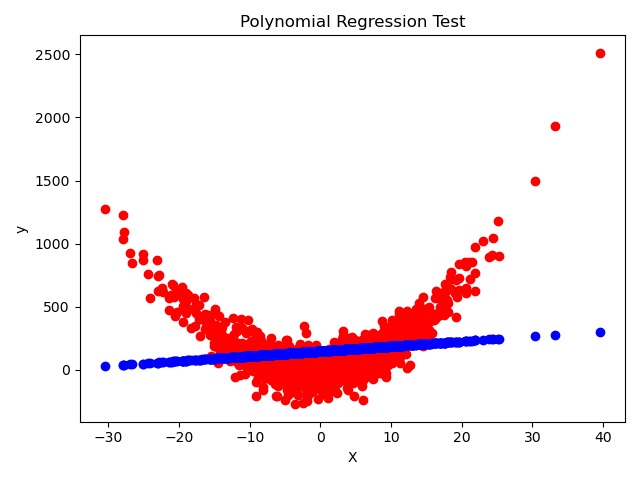

In [8]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg1.predict(X),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

In [9]:
b0 = lin_reg1.intercept_[0]
b1 = lin_reg1.coef_[0][0]
r2 = lin_reg1.score(X, y)

In [10]:
print(f"Y = {b0} + {b1}x")
print(f"R^2: {r2}")

Y = 148.1619469528557 + 3.889315352288554x
R^2: 0.023893162383578526


... using fstring formatting, we can display these values as follows...

In [11]:
print(f"Y = {b0:.2f} + {b1:.2f}x")
print(f"R^2: {r2:.3f}") 
# for more on fstrings see here https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/

Y = 148.16 + 3.89x
R^2: 0.024


## Step 6: Try another model (in this case, a second order polynomial)

Create the features (that is, x and x^2) for the linear regression. Then do all the analysis we did above again.

In [12]:
X_poly=PolynomialFeatures(degree=2).fit_transform(X)

Fit this model to the polynomial features...

In [13]:
lin_reg2=LinearRegression().fit(X_poly,y)

Explore the results visually...

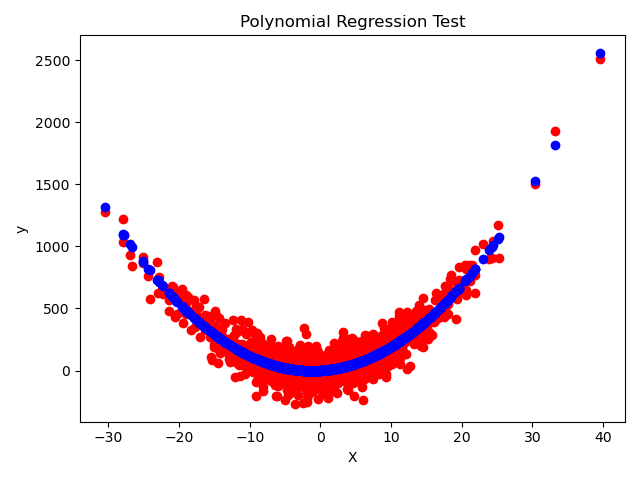

In [14]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg2.predict(X_poly),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

Look at what the 'hidden model' is that we have identified...

In [15]:
print(f"Y = {lin_reg2.intercept_[0]:.2f} + {lin_reg2.coef_[0][1]:.2f}x + {lin_reg2.coef_[0][2]:.2f}x^2")
print(f"R^2: {lin_reg2.score(X_poly, y):.2f}")

Y = -0.12 + 3.73x + 1.54x^2
R^2: 0.83
